# prediction model for profit of 50_startups data.

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

%matplotlib inline

In [58]:
data_1 = pd.read_csv("50_Startups.csv")
data_1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [59]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [60]:
data_1.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [61]:
data_1['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [62]:
data_1['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [63]:
data_2 = pd.get_dummies(data_1,columns=['State'])
data_2.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [64]:
data_3=data_2.rename({'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend' , 'State_New York' : 'State_New_York'},axis=1)

In [65]:
data_3.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


<AxesSubplot:>

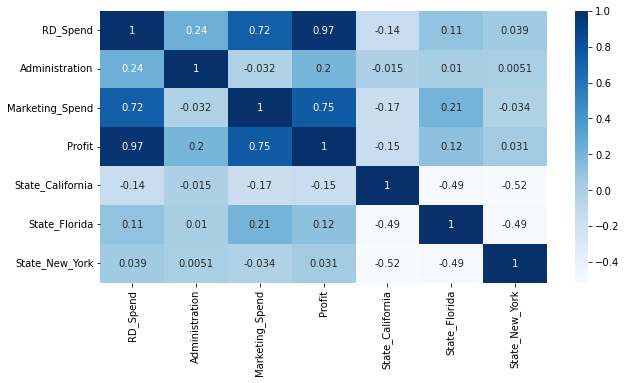

In [66]:
plt.figure(figsize=(10,5))
sns.heatmap(data_3.corr(),annot=True,cmap='Blues')

In [67]:
 # Marketing_Spend and RD_Spend are more correlated

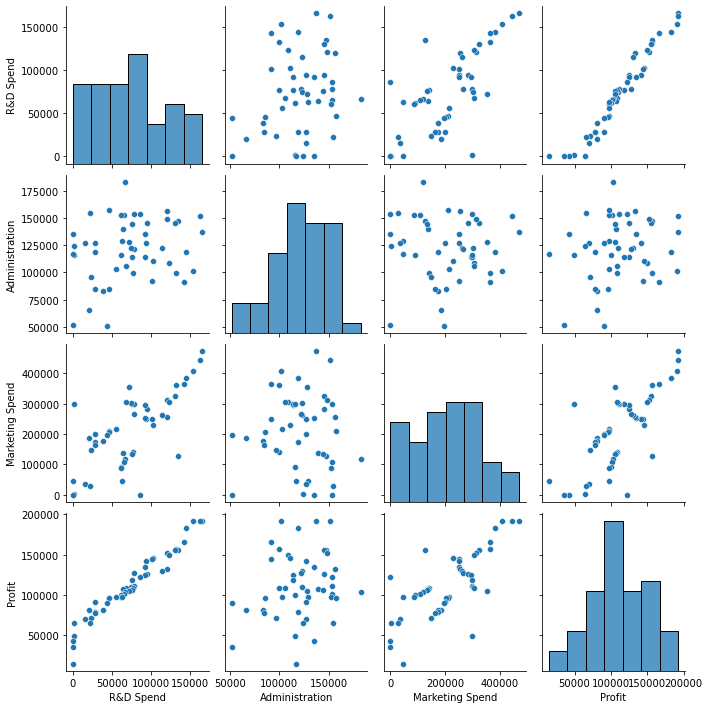

In [68]:
sns.pairplot(data_1)

In [69]:
data_3[data_3.duplicated()]

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York


# Model 1

In [70]:
model_1=smf.ols('Profit ~ RD_Spend + Administration + Marketing_Spend + State_California + State_Florida + State_New_York ',data=data_3).fit()

In [71]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.34e-27
Time:                        14:36:42   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD_Spend             0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_New_York    1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.98e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.37e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
data_3[data_3.duplicated()]

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York


In [73]:
rsq_RD_Spend = smf.ols('RD_Spend ~ Administration + Marketing_Spend + State_California + State_Florida + State_New_York',data=data_3 ).fit().rsquared  
vif_RD_Spend = 1/(1-rsq_RD_Spend)  

rsq_Administration = smf.ols('Administration ~ RD_Spend + Marketing_Spend + State_California + State_Florida + State_New_York',data= data_3).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) 

rsq_Marketing_Spend = smf.ols('Marketing_Spend ~ RD_Spend + Administration + State_California + State_Florida + State_New_York',data= data_3).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend) 

rsq_State_California= smf.ols('State_California ~ RD_Spend + Marketing_Spend + Administration + State_Florida + State_New_York',data= data_3).fit().rsquared  
vif_State_California = 1/(1-rsq_State_California) 

rsq_State_Florida= smf.ols('State_Florida ~ RD_Spend + Marketing_Spend + Administration + State_Florida + State_New_York',data= data_3).fit().rsquared  
vif_State_Florida = 1/(1-rsq_State_Florida) 

rsq_State_New_York= smf.ols('State_California ~ RD_Spend + Marketing_Spend + Administration + State_Florida + State_New_York',data= data_3).fit().rsquared  
vif_State_New_York = 1/(1-rsq_State_New_York) 



# Storing vif values in a data frame
d1 = {'Variables':['RD_Spend','Administration','Marketing_Spend','State_California','State_Florida','State_New_York'],'VIF':[vif_RD_Spend,vif_Administration,vif_Marketing_Spend,vif_State_California,vif_State_Florida,vif_State_New_York]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

C:\Users\Dell\AppData\Local\Temp\ipykernel_19476\1143294686.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  vif_State_California = 1/(1-rsq_State_California)
C:\Users\Dell\AppData\Local\Temp\ipykernel_19476\1143294686.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif_State_Florida = 1/(1-rsq_State_Florida)
C:\Users\Dell\AppData\Local\Temp\ipykernel_19476\1143294686.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  vif_State_New_York = 1/(1-rsq_State_New_York)


,Variables,VIF
0,RD_Spend,2.495511
1,Administration,1.177766
2,Marketing_Spend,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_New_York,inf


In [74]:
slr_1=smf.ols('Profit ~ RD_Spend',data=data_3).fit()
slr_1.tvalues , slr_1.pvalues

(Intercept    19.320288
 RD_Spend     29.151139
 dtype: float64,
 Intercept    2.782697e-24
 RD_Spend     3.500322e-32
 dtype: float64)

In [75]:
slr_2=smf.ols('Profit ~ Marketing_Spend',data=data_3).fit()
slr_2.tvalues , slr_2.pvalues

(Intercept          7.808356
 Marketing_Spend    7.802657
 dtype: float64,
 Intercept          4.294735e-10
 Marketing_Spend    4.381073e-10
 dtype: float64)

In [76]:
# RD_Spend and Marketing_Spend one group

In [77]:
mlr=smf.ols('Profit ~ RD_Spend + Marketing_Spend',data=data_3).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.16e-31
Time:                        14:36:43   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD_Spend            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

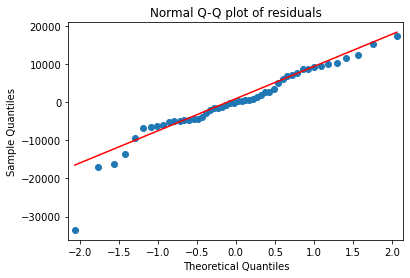

In [78]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_1.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [79]:
model_2=smf.ols('Profit ~  Administration + Marketing_Spend + State_California + State_Florida + State_New_York ',data=data_3).fit()

In [80]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     17.83
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           7.78e-09
Time:                        14:36:46   Log-Likelihood:                -576.91
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      45   BIC:                             1173.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.482e+04   1.36e+04      1.091      0.281   -1.25e+04    4.22e+04
Administration       0.3239      0.133      2.426      0.019       0.055       0.593
Marketing_Spend      0.2507      0.031      7.997      0.000       0.188       0.314
State_California  4214.9699   6660.035      0.633      0.530   -9199.028    1.76e+04
State_Florida     2511.2671   7380.550      0.340      0.735   -1.24e+04    1.74e+04
State_New_York    8090.7324   6855.885      1.180      0.244   -5717.730    2.19e+04
==============================================================================
Omnibus:                        5.729   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.349
Skew:                          -0.461   Prob(JB):                       0.0689
Kurtosis:                       4.311   Cond. No.                     1.56e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [82]:
model_3=smf.ols('Profit ~ RD_Spend + Administration + State_California + State_Florida + State_New_York ',data=data_3).fit()

In [83]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.90e-28
Time:                        14:37:40   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.122e+04   4607.941      8.945      0.000    3.19e+04    5.05e+04
RD_Spend             0.8609      0.031     27.665      0.000       0.798       0.924
Administration      -0.0527      0.050     -1.045      0.301      -0.154       0.049
State_California  1.339e+04   2421.500      5.529      0.000    8511.111    1.83e+04
State_Florida     1.448e+04   2518.987      5.748      0.000    9405.870    1.96e+04
State_New_York    1.335e+04   2459.306      5.428      0.000    8395.623    1.83e+04
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.260
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     1.66e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.93e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# p_value is high for Administration

In [84]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

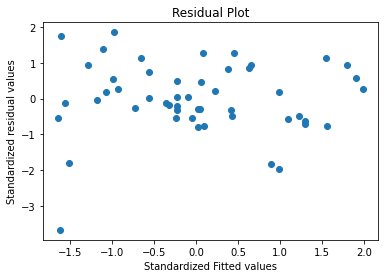

In [86]:
plt.scatter(get_standardized_values(model_3.fittedvalues),
            get_standardized_values(model_3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

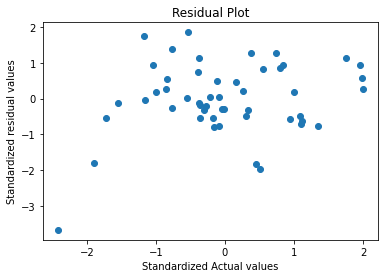

In [88]:
plt.scatter(get_standardized_values(data_3.Profit),
            get_standardized_values(model_3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Actual values')
plt.ylabel('Standardized residual values')
plt.show()

In [90]:
model_4=smf.ols('Profit ~ RD_Spend + State_California + State_Florida + State_New_York ',data=data_3).fit() # preparing model by removing Administration
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.76e-29
Time:                        15:24:19   Log-Likelihood:                -527.35
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.686e+04   1959.786     18.806      0.000    3.29e+04    4.08e+04
RD_Spend             0.8530      0.030     28.226      0.000       0.792       0.914
State_California  1.189e+04   1956.677      6.079      0.000    7955.697    1.58e+04
State_Florida     1.306e+04   2122.665      6.152      0.000    8785.448    1.73e+04
State_New_York     1.19e+04   2036.022      5.847      0.000    7805.580     1.6e+04
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.605
Skew:                          -0.907   Prob(JB):                     0.000150
Kurtosis:                       5.271   Cond. No.                     2.41e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.45e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

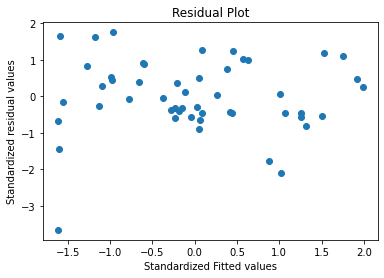

In [93]:
plt.scatter(get_standardized_values(model_4.fittedvalues),
            get_standardized_values(model_4.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

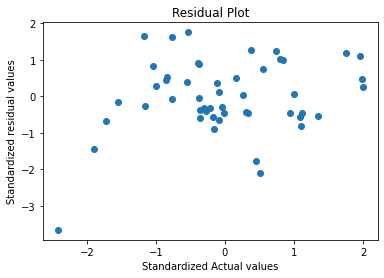

In [94]:
plt.scatter(get_standardized_values(data_3.Profit),
            get_standardized_values(model_4.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Actual values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


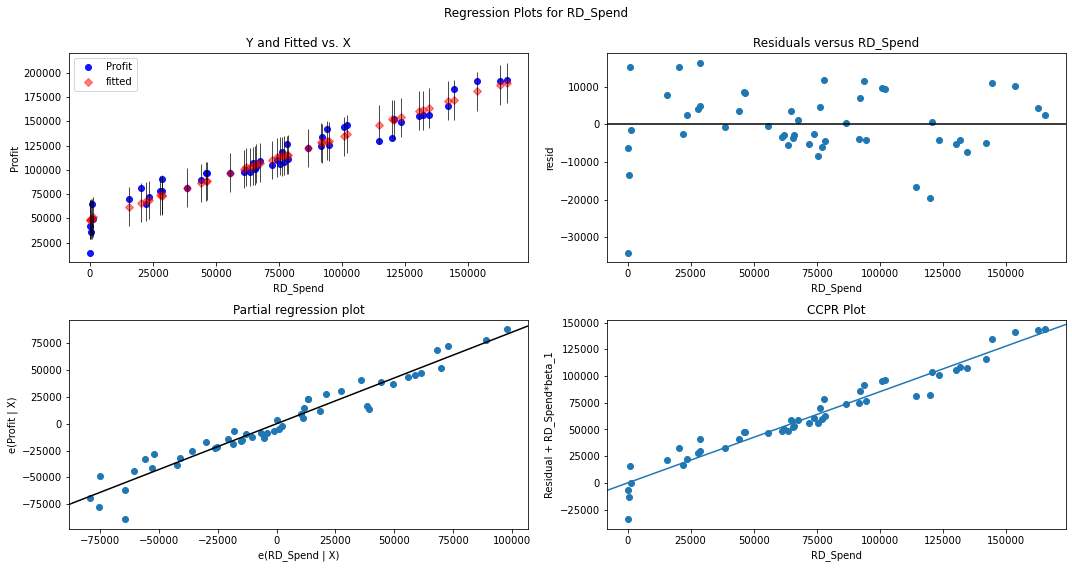

In [96]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model_4, "RD_Spend", fig=fig)
plt.show()


In [98]:
model_influence = model_4.get_influence()
(c, _) = model_influence.cooks_distance

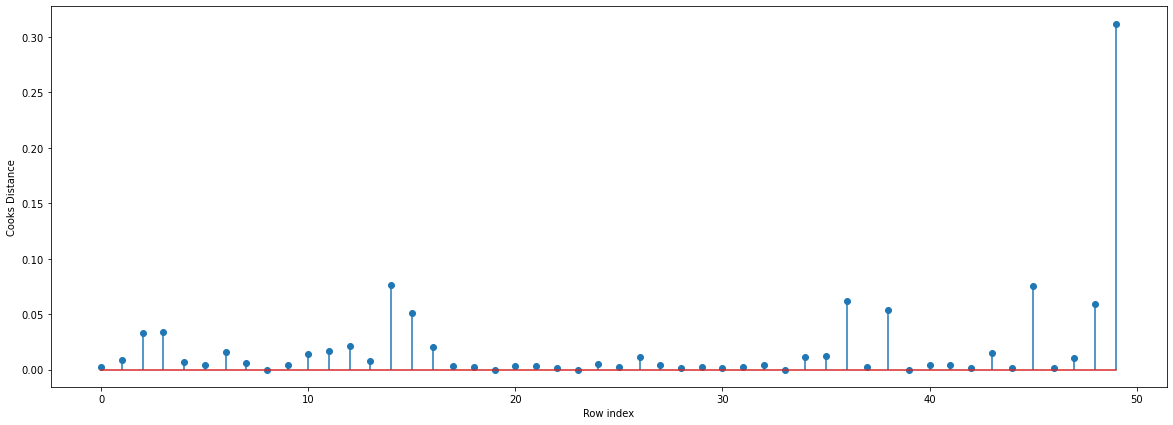

In [100]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(data_3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [101]:
(np.argmax(c),np.max(c))

(49, 0.31169619437841667)

In [103]:
np.where(c>0.3116)

(array([49], dtype=int64),)

In [107]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data_4 = data_3.drop(data_3.index[[49]],axis=0).reset_index()
data_4.head()

,index,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [109]:
data_4.shape

(49, 8)

In [114]:
model_5 = smf.ols('Profit ~ RD_Spend + State_California + State_Florida + State_New_York',data=data_4).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     340.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           6.26e-31
Time:                        15:37:05   Log-Likelihood:                -508.42
No. Observations:                  49   AIC:                             1025.
Df Residuals:                      45   BIC:                             1032.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.876e+04   1707.520     22.698      0.000    3.53e+04    4.22e+04
RD_Spend             0.8288      0.026     31.792      0.000       0.776       0.881
State_California  1.379e+04   1704.699      8.089      0.000    1.04e+04    1.72e+04
State_Florida     1.312e+04   1790.310      7.326      0.000    9509.693    1.67e+04
State_New_York    1.185e+04   1717.230      6.902      0.000    8392.789    1.53e+04
==============================================================================
Omnibus:                        0.005   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.998   Jarque-Bera (JB):                0.150
Skew:                          -0.003   Prob(JB):                        0.928
Kurtosis:                       2.729   Cond. No.                     8.04e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.8e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [118]:
table=pd.DataFrame({ 'Model':['model_1','model_2','model_3','model_4','model_5'],
                    'R_squared value':[model_1.rsquared,model_2.rsquared,model_3.rsquared,model_4.rsquared,model_5.rsquared]})

In [119]:
table

,Model,R_squared value
0,model_1,0.947980
1,model_2,0.613108
2,model_3,0.947980
3,model_4,0.946717
4,model_5,0.957797


In [ ]:
# final model is model_5